In [1]:
import numpy as np
import matplotlib.pyplot as plt


from allensdk.brain_observatory.ecephys.ecephys_dataset import eager_read_dataset_from_nwbfile

In [2]:
def accumulate_spike_counts(spike_times, start_time, end_time, bins=10000):
    timestamps = np.linspace(start_time, end_time, bins+1)
    counts = np.zeros((len(spike_times), bins))
    units = []
    
    for ii, (unit_id, times) in enumerate(spike_times.items()):
        counts[ii, :] = np.histogram(times, bins=bins, range=(start_time, end_time))[0]
        units.append(unit_id)
    
    return units, timestamps, counts

In [3]:
path = (
    '/allen/scratch/aibstemp/nileg/allen/programs/braintv/production/neuralcoding/prod56/specimen_757329624/ecephys_session_773418906/EcephysWriteNwbStrategy/analysis_run_812470519/ecephys_session_773418906.nwb'
)


In [4]:
ds = eager_read_dataset_from_nwbfile(path)

In [5]:
units_channels = ds.units.merge(
    ds.channels, left_on='peak_channel_id', right_index=True, suffixes=('', '_ch'), validate='many_to_one'
)
valid_units_df = units_channels[
    (units_channels['valid_data'] == True) 
    & (units_channels['quality'] == 'good')
]
valid_units = set(valid_units_df.index.values) 

In [6]:
print(valid_units_df.shape)
valid_units_df.head()

(1002, 11)


,firing_rate,isi_violations,local_index,peak_channel_id,quality,snr,local_index_ch,probe_horizontal_position,probe_id,probe_vertical_position,valid_data
id,,,,,,,,,,,
812239246,12.831241,0.756442,3,812238472,good,1.704780,0,43,792676162,20,True
812239250,7.582698,1.390232,5,812238472,good,3.144682,0,43,792676162,20,True
812239276,0.752180,7.992534,18,812238472,good,1.054060,0,43,792676162,20,True
812239942,0.391093,9.460191,351,812238472,good,0.973280,0,43,792676162,20,True
812239944,8.275209,1.107944,352,812238472,good,2.498458,0,43,792676162,20,True


In [7]:
units, timestamps, counts = accumulate_spike_counts(
    {k: v for k, v in ds.spike_times.items() if k in valid_units}, 9000, 9100, bins=1000
)

<IPython.core.display.Javascript object>


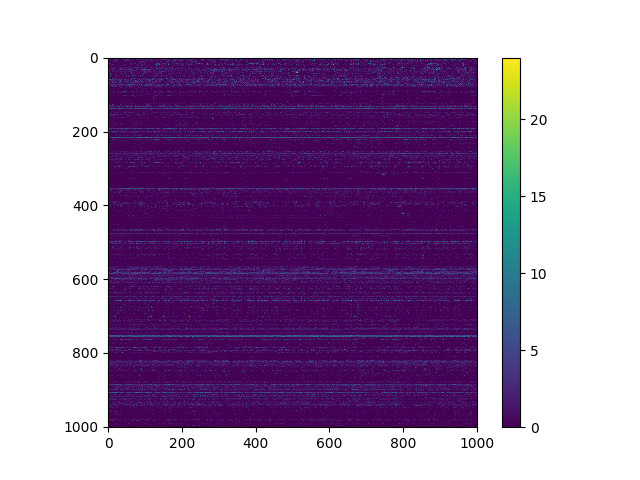

In [16]:
%matplotlib notebook
plt.subplots()
plt.imshow(counts, interpolation='none')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


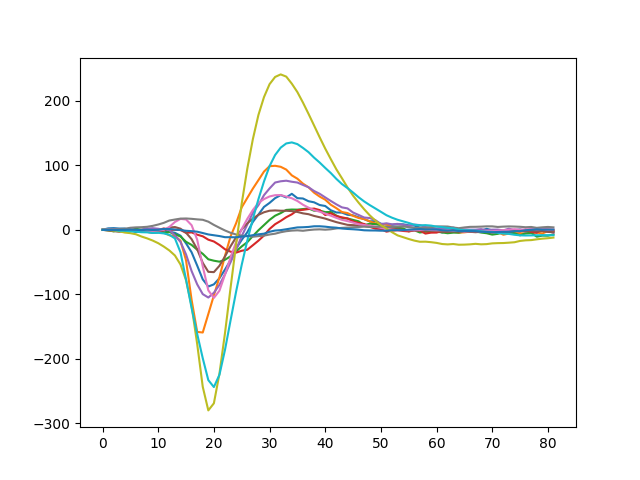

In [15]:
%matplotlib notebook
plt.subplots()
for ii, (uid, row) in enumerate(valid_units_df.iterrows()):
    plt.plot(ds.mean_waveforms[uid][row['local_index_ch'], :])
    if ii >= 10:
        break
plt.show()

<IPython.core.display.Javascript object>


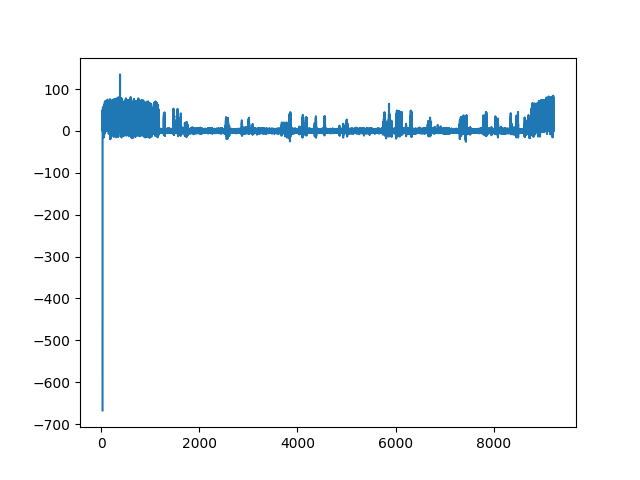

In [17]:
%matplotlib notebook
plt.subplots()
plt.plot(ds.running_speed_timestamps, ds.running_speed)
plt.show()

In [11]:
ds.channels.head()

,local_index,probe_horizontal_position,probe_id,probe_vertical_position,valid_data
id,,,,,
812239238,383,27,792676162,3840,True
812239236,382,59,792676162,3840,True
812239234,381,11,792676162,3820,True
812239232,380,43,792676162,3820,True
812239230,379,27,792676162,3800,False


In [12]:
ds.units.head()

,firing_rate,isi_violations,local_index,peak_channel_id,quality,snr
id,,,,,,
812239240,0.521230,2.669358,0,812238472,noise,0.565049
812239242,0.161546,15.599988,1,812238472,noise,0.552988
812239244,15.528067,0.462636,2,812238478,good,1.798410
812239246,12.831241,0.756442,3,812238472,good,1.704780
812239248,11.298070,0.665183,4,812238474,good,0.670913


In [13]:
ds.probes

,id,name
0,792676154,probeA
1,792676156,probeB
2,792676158,probeC
3,792676160,probeD
4,792676162,probeE
5,792676164,probeF


In [14]:
ds.stimulus_epochs.head()

,start_time,stop_time,stimulus_name,stimulus_block,TF,SF,Ori,Contrast,Pos_x,Pos_y,stimulus_index,Color,Image,Phase
id,,,,,,,,,,,,,,
0,29.468891,89.535683,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,89.535683,89.769196,gabor_20_deg_250ms,0.0,4.0,0.08,0.0,0.8,30.0,10.0,0.0,NaN,NaN,NaN
2,89.769196,90.019394,gabor_20_deg_250ms,0.0,4.0,0.08,90.0,0.8,-20.0,-10.0,0.0,NaN,NaN,NaN
3,90.019394,90.269592,gabor_20_deg_250ms,0.0,4.0,0.08,45.0,0.8,40.0,30.0,0.0,NaN,NaN,NaN
4,90.269592,90.519791,gabor_20_deg_250ms,0.0,4.0,0.08,90.0,0.8,20.0,40.0,0.0,NaN,NaN,NaN
